# Logistic Regression Model for Financial Fraud Detection

This notebook demonstrates the implementation of a Logistic Regression model for detecting fraudulent financial transactions. We will use the preprocessed data from the previous steps.

## Importing Libraries

We start by importing the necessary libraries.

In [31]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import (f1_score, recall_score, precision_score,
                             classification_report, confusion_matrix,
                             precision_recall_curve, precision_recall_fscore_support)
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme('notebook')

## Load necessary data

In [2]:
file = r'fin_data_processed.csv'
df_encoded = pd.read_csv(file)

df_encoded.head(10)

,time_of_day_EarlyMorning,time_of_day_Evening,time_of_day_LateAfternoon,time_of_day_LateMorning,time_of_day_LateNight,time_of_day_Morning,time_of_day_Night,cred_type_Credit Card,cred_type_Debit Card,cred_type_Home Loan,...,error_code_U90,error_code_U91,error_code_U92,error_code_U93,error_code_U94,error_code_U96,payee_requested_amount,payee_settlement_amount,difference_amount,targets
0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0.130872,0.046728,0.200272,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,-0.432866,-0.459216,0.200272,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,-0.939230,-0.913669,0.200272,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0.407328,0.294842,0.200272,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0.772327,0.622422,0.200272,0
5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,-1.195757,-1.143897,0.200272,0
6,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0.703437,0.560595,0.200272,0
7,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1.429297,1.212041,0.200272,0
8,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1.672791,1.430572,0.200272,0
9,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,-1.377188,-1.306728,0.200272,1


Separate the dataset into two parts, the inputs (X) and the targets (y)


In [5]:
inputs = df_encoded.iloc[:, :-1]
targets = df_encoded.iloc[:, -1]

In [6]:
fraud_count = targets.sum()
print(f"Fraudulent transactions: {fraud_count}\nTotal transactions: {len(targets)}")

Fraudulent transactions: 3585
Total transactions: 55671


To address the imbalance in the data we will use over sampling technique SMOTE

In [9]:
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size= 0.2, random_state= 42, stratify= targets)

smote = SMOTE(random_state= 42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [11]:
print(f"After SMOTE:\nFraudulent transactions: {y_train_smote.sum()}\nTotal Transactions: {len(y_train_smote)}")

After SMOTE:
Fraudulent transactions: 41668
Total Transactions: 83336


# Model:

## Implementation of Logistic Regression Model

In this section, we implement a Logistic Regression model to detect fraudulent financial transactions.

The logistic regression model is instantiated with parameters such as `penalty= 'l2'`, `class_weight= 'balanced'`, `solver= 'newton-cholesky'`, and `verbosity= 2`.
We fit the model to the training data (after applying SMOTE). The performance of the model is evaluated using various metrics such as `F1-score`, `recall`, `precision`, `classification report`, and `confusion matrix`. These metrics provide insights into the model's ability to correctly identify fraudulent transactions and its overall performance.

Visualizations such as `precision-recall curves` and `confusion matrix` heatmaps are also generated to aid in understanding the model's behavior and performance.

In [25]:
log_reg = LogisticRegression(
    penalty= 'l2',
    class_weight= 'balanced',
    random_state= 42,
    solver= 'newton-cholesky',
    verbose= 2
)
# Train model
log_reg.fit(X_train_smote, y_train_smote)

Newton iter=1
  Backtracking Line Search
    eps=10 * finfo.eps=3.552713678800501e-15
    line search iteration=1, step size=1
      check loss improvement <= armijo term: -0.014430108995799551 <= -1.3258789911545334e-05 True
  Check Convergence
    1. max |gradient| 0.0019149442038670882 <= 0.0001
Newton iter=2
  Backtracking Line Search
    eps=10 * finfo.eps=3.552713678800501e-15
    line search iteration=1, step size=1
      check loss improvement <= armijo term: -0.0005599048108394511 <= -4.787493720955699e-07 True
  Check Convergence
    1. max |gradient| 0.0002849948293523214 <= 0.0001
Newton iter=3
  Backtracking Line Search
    eps=10 * finfo.eps=3.552713678800501e-15
    line search iteration=1, step size=1
      check loss improvement <= armijo term: -5.2848009374883986e-05 <= -4.6312294137103875e-08 True
  Check Convergence
    1. max |gradient| 3.241665379935532e-05 <= 0.0001
    2. Newton decrement 4.742378919639437e-05 <= 0.0001
  Solver did converge at loss = 0.67810431

LogisticRegression(class_weight='balanced', random_state=42,
                   solver='newton-cholesky', verbose=2)

In [26]:
y_pred = log_reg.predict(X_test)

f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Generate classification report
class_report = classification_report(y_test, y_pred)

# Generate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

print("F1 Score:", np.round(f1, 3))
print("Recall Score:", np.round(recall, 3))
print("Precision Score:", np.round(precision, 3))
print("\nClassification Report:")
print(class_report)
print("\nConfusion Matrix:")
print(conf_mat)

F1 Score: 0.124
Recall Score: 0.607
Precision Score: 0.069

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.44      0.60     10418
           1       0.07      0.61      0.12       717

    accuracy                           0.45     11135
   macro avg       0.51      0.52      0.36     11135
weighted avg       0.89      0.45      0.57     11135


Confusion Matrix:
[[4572 5846]
 [ 282  435]]


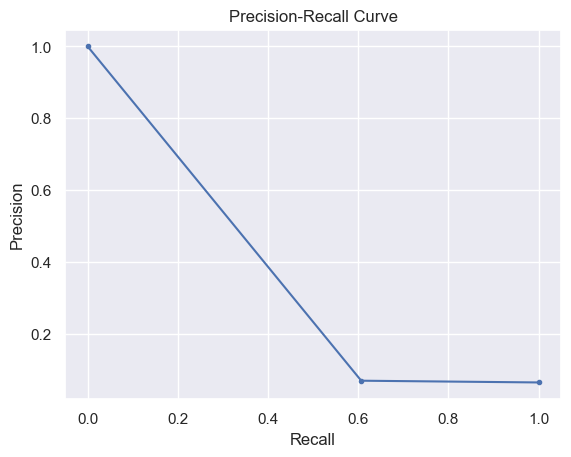

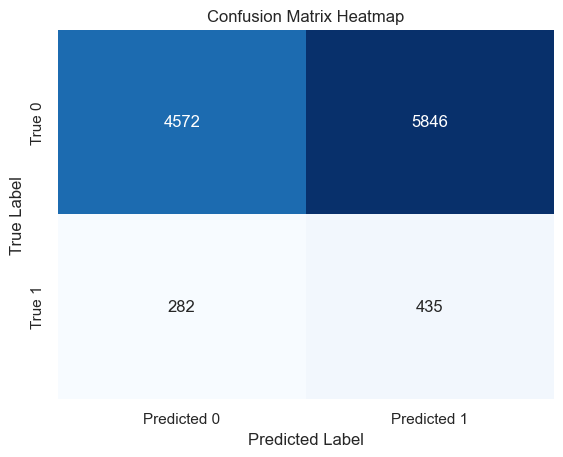

In [27]:
# Generate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Plot Precision-Recall Curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

# Plot Confusion Matrix Heatmap
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks=[0.5, 1.5], labels=['Predicted 0', 'Predicted 1'])
plt.yticks(ticks=[0.5, 1.5], labels=['True 0', 'True 1'])
plt.show()

In [28]:
# Generate precision, recall, f-score, and support
precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred)

# Convert precision, recall, fscore, support to a numpy array
metrics_array = np.array([precision, recall, fscore, support])

# Create a DataFrame for better visualization
metrics_df = pd.DataFrame(metrics_array.T, columns=['Precision', 'Recall', 'F-score', 'Support'])

# Display the DataFrame
print("Metrics:")
metrics_df


Metrics:


,Precision,Recall,F-score,Support
0,0.941904,0.438856,0.598743,10418.0
1,0.069256,0.606695,0.124321,717.0


## Implementation of Logistic Regression Model with Grid Search

In this section, we implement another Logistic Regression model, but this time we utilize Grid Search for hyperparameter tuning. We define a parameter grid consisting of different combinations of penalties, regularization strengths (C values), and solvers. The grid search algorithm iteratively searches through these parameter combinations using cross-validation to find the optimal hyperparameters that maximize the F1 score.

The logistic regression model instantiated in this section includes the class_weight parameter set to 'balanced' to account for class imbalance. We then perform grid search with k-fold cross-validation, where k is set to 10. The best-performing model obtained from grid search, based on F1 score, is selected for evaluation on the test data.

Similar to the first model, we evaluate the performance of this tuned logistic regression model using metrics such as F1 score, recall, precision, classification report, and confusion matrix. These metrics provide insights into the effectiveness of hyperparameter tuning in improving model performance compared to the baseline logistic regression model.

In [41]:
another_logreg_model = LogisticRegression(random_state= 42, class_weight= 'balanced', verbose= 1)

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 0.5, 1],
    'solver': ['liblinear', 'newton-cholesky']
}

grid_search = GridSearchCV(another_logreg_model, param_grid, cv= KFold(n_splits= 10, random_state= 42, shuffle= True), scoring= 'f1')
grid_search.fit(X_train_smote, y_train_smote)

best_model = grid_search.best_estimator_

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]Newton iter=1
  Check Convergence
    1. max |gradient| 0.0009837679837302014 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 2.90108580165635e-05 <= 0.0001
    2. Newton decrement 7.593508030144831e-05 <= 0.0001
  Solver did converge at loss = 0.6814949467763692.
Newton iter=1
  Check Convergence
    1. max |gradient| 0.0009665178111594747 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 2.790411706574819e-05 <= 0.0001
    2. Newton decrement 7.356848193928539e-05 <= 0.0001
  Solver did converge at loss = 0.6816587954175001.
Newton iter=1
  Check Convergence
    1. max |gradient| 0.0010090146960900527 <= 0.0001
Newton iter=2
  Check Convergence
    1. max |gradient| 3.094446950826363e-05 <= 0.0001
    2. Newton decrement 8.03922371803

c:\Users\jadia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
30 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\jadia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\jadia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\jadia\AppDa

In [42]:
y_pred = best_model.predict(X_test)

In [43]:
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(f"Confusion Matrix:\n {confusion_matrix(y_test, y_pred)}")
print(f"Classification Report:\n {classification_report(y_test, y_pred)}")
print(f"Recall Score: {recall_score(y_test, y_pred)}")
print(f"Precision Score: {precision_score(y_test, y_pred)}")

F1 Score: 0.12446596411278837
Confusion Matrix:
 [[4550 5868]
 [ 280  437]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.44      0.60     10418
           1       0.07      0.61      0.12       717

    accuracy                           0.45     11135
   macro avg       0.51      0.52      0.36     11135
weighted avg       0.89      0.45      0.57     11135

Recall Score: 0.6094839609483961
Precision Score: 0.06931007137192705


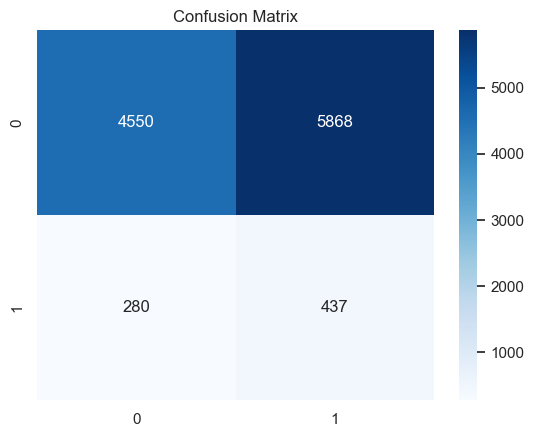

In [44]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

## Conclusion

In this analysis, we implemented two logistic regression models for fraud detection using financial transaction data. Let's summarize the performance of each model:

### First Logistic Regression Model:
- **F1 Score:** 0.124
- **Recall Score:** 0.607
- **Precision Score:** 0.069

**Classification Report:**
|              | Precision | Recall | F1-Score | Support |
|--------------|-----------|--------|----------|---------|
|      0       |    0.94   |  0.44  |   0.60   |  10418  |
|      1       |    0.07   |  0.61  |   0.12   |   717   |
|   *Accuracy* |           |        |   0.45   |  11135  |

**Confusion Matrix:**
|4572 |5846|
|-----|---|
|282 |435|


### Second Logistic Regression Model:
- **F1 Score:** 0.1245
- **Recall Score:** 0.609
- **Precision Score:** 0.0693

**Classification Report:**
|              | Precision | Recall | F1-Score | Support |
|--------------|-----------|--------|----------|---------|
|      0       |    0.94   |  0.44  |   0.60   |  10418  |
|      1       |    0.07   |  0.61  |   0.12   |   717   |
|   *Accuracy* |           |        |   0.45   |  11135  |

**Confusion Matrix:**
|4550 |5868|
|-----|---|
|280 |437|


Both models exhibit similar performance metrics, with low F1 scores indicating poor predictive ability. The recall scores suggest that the models correctly identify fraudulent transactions only around 60% of the time, while the precision scores indicate a high rate of false positives. 

Given the underperformance of logistic regression models, the next step could involve exploring more complex algorithms such as Random Forest Classifier (RFC) to improve fraud detection accuracy. RandomForestClassifier tends to handle imbalanced datasets better and might provide better predictive performance compared to logistic regression models in this scenario.

# END OF DOCUMENT